# Use OpenCV for Basic Image Processing

## Section 0: Read, Show, and Write Image

Reference: https://opencv.org/blog/read-display-and-write-an-image-using-opencv/#h-writing-an-image-in-opencv

In [9]:
# first use the following codes to mount your Google Drive in Colab and read images from it.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2

In [4]:
# Load the image in color mode
ast_path = "/content/drive/MyDrive/Teaching/Computer_Vision/Sample_Data/opencv_tutorial/astronaut.jpeg"
ast_image1 = cv2.imread(ast_path, cv2.IMREAD_COLOR)
ast_image2 = cv2.imread(ast_path, cv2.IMREAD_GRAYSCALE)
ast_image3 = cv2.imread(ast_path, cv2.IMREAD_UNCHANGED)

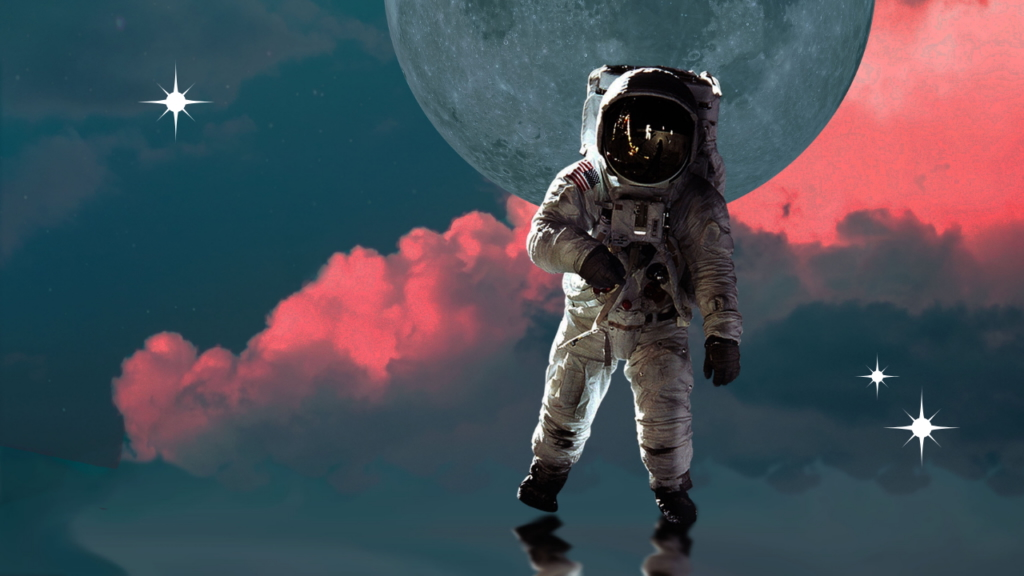

In [5]:
# Note: cv2.imshow() does not work in Google Colab.
# you need to use cv2_imshow() from google.colab.patches to display images.
from google.colab.patches import cv2_imshow

cv2_imshow(ast_image1)

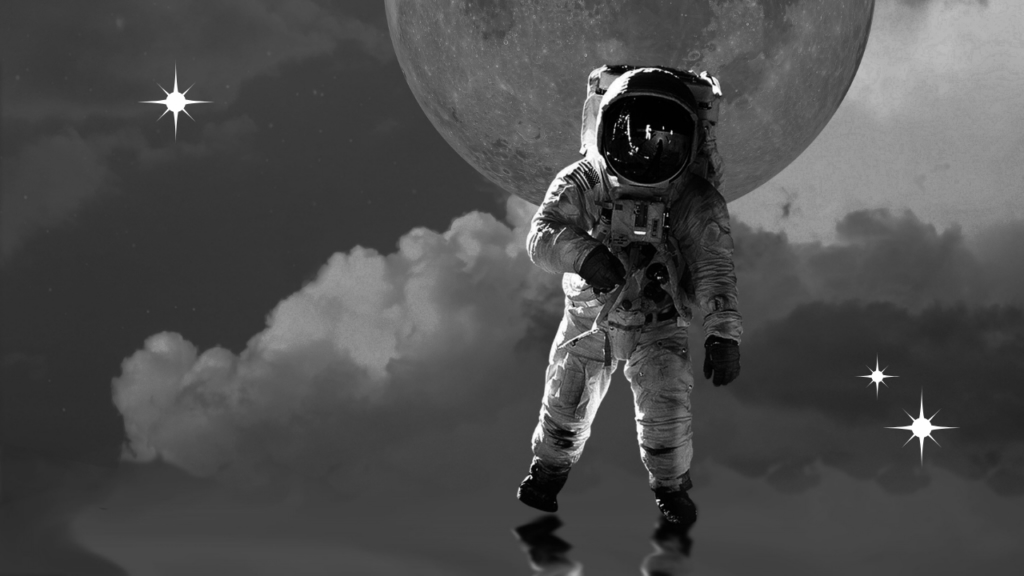

In [6]:
cv2_imshow(ast_image2)

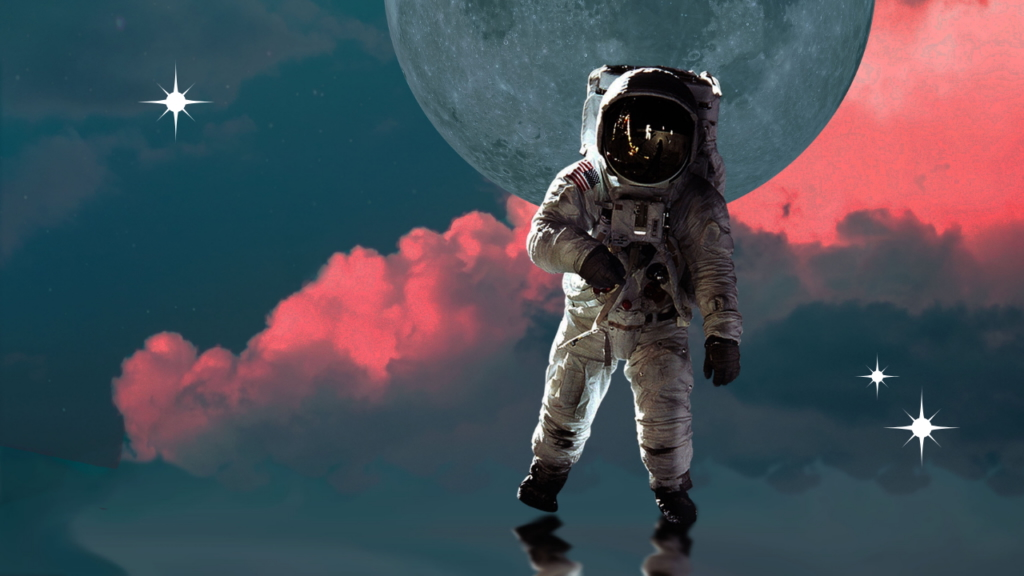

In [7]:
cv2_imshow(ast_image3)

In [11]:
# write an image
# note: you do not need to specify the flags (color or grayscale) like cv2.imread
output_path = "/content/drive/MyDrive/Teaching/Computer_Vision/Sample_Data/Outputs/ast_color.png"
cv2.imwrite(output_path, ast_image1)
output_path = "/content/drive/MyDrive/Teaching/Computer_Vision/Sample_Data/Outputs/ast_gray.png"
cv2.imwrite(output_path, ast_image2)

True

## Section 1: Basic Operations on Images

Reference: https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html

In [12]:
# access image properties
print(f"shape of color image: {ast_image1.shape}")
print(f"shape of grayscale image: {ast_image2.shape}")

shape of color image: (576, 1024, 3)
shape of grayscale image: (576, 1024)


In [13]:
# access and modify image pixel
px = ast_image1[100, 100]
print(f"pixel value at location [100, 100]: {px}")

pixel value at location [100, 100]: [83 68 35]


In [14]:
# access only blue pixel (note: OpenCV default channel order is BGR)
blue = ast_image1[100, 100, 0]
print(f"blue value at location [100, 100]: {blue}")

blue value at location [100, 100]: 83


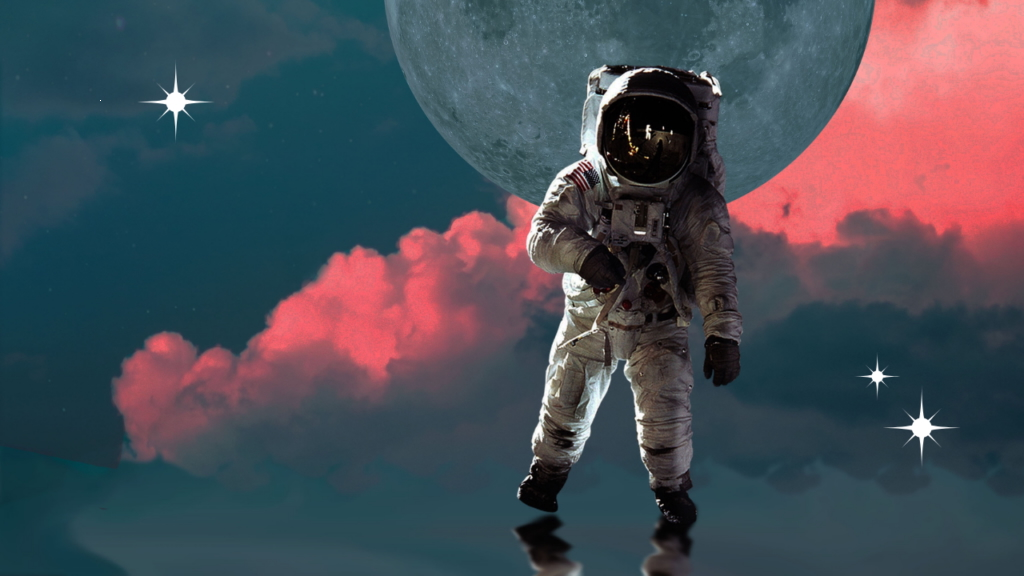

In [15]:
# modify the pixel value
ast_image1[100, 100] = [255, 255, 255]
cv2_imshow(ast_image1)

## Section 2: Crop, Resize, Color Space Transformation

Reference:
- https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html
- https://opencv.org/blog/resizing-and-rescaling-images-with-opencv/#h-opencv-function-to-resize-images
- https://opencv.org/blog/color-spaces-in-opencv/

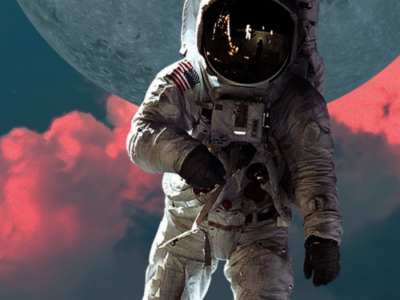

In [18]:
# You can crop the image using slicing operations, which are commonly used in NumPy/PyTorch
cropped = ast_image1[100:400, 400:800]
cv2_imshow(cropped)

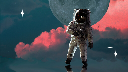

In [26]:
# resize using nearest-neighbor interpolation
new_width = 128
new_height = 72
resized_nn = cv2.resize(ast_image1, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_nn)

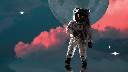

In [25]:
# resize using bilinear interpolation
resized_bl = cv2.resize(ast_image1, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_bl)

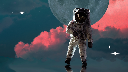

In [27]:
# resize using bicubic interpolation
resized_bc = cv2.resize(ast_image1, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_bc)

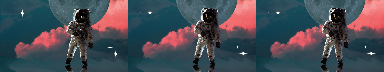

In [28]:
# put them together to see difference
import numpy as np
disp = np.concatenate([resized_nn, resized_bl, resized_bc], axis=1)
cv2_imshow(disp)

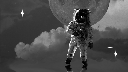

In [30]:
# change color space to grayscale using cvtColor()
disp = cv2.cvtColor(resized_nn, cv2.COLOR_BGR2GRAY)
cv2_imshow(disp)

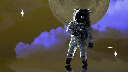

In [32]:
# If you want BGR → RGB (just for proper color display in libraries like matplotlib)
disp = cv2.cvtColor(resized_nn, cv2.COLOR_BGR2RGB)
cv2_imshow(disp)

## Section 3: Histogram Equalization

reference: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

### Theory
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in the image from [wikipedia](https://en.wikipedia.org/wiki/Histogram_equalization)) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

/tmp/ipython-input-1641831585.py:10: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(ast_image2.flatten(),256,[0,256], color = 'r')


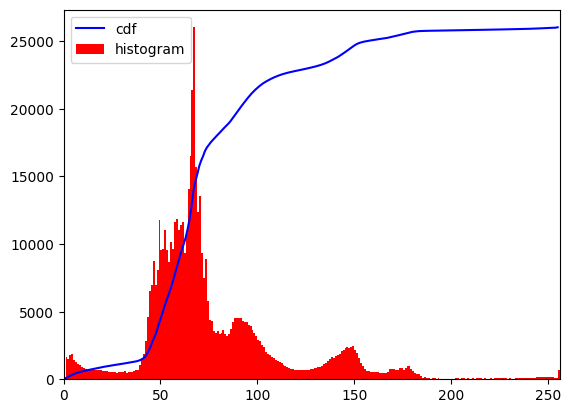

In [33]:
from matplotlib import pyplot as plt

# here we use the grayscale version
hist,bins = np.histogram(ast_image2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

# plot the histogram and cdf
plt.plot(cdf_normalized, color = 'b')
plt.hist(ast_image2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

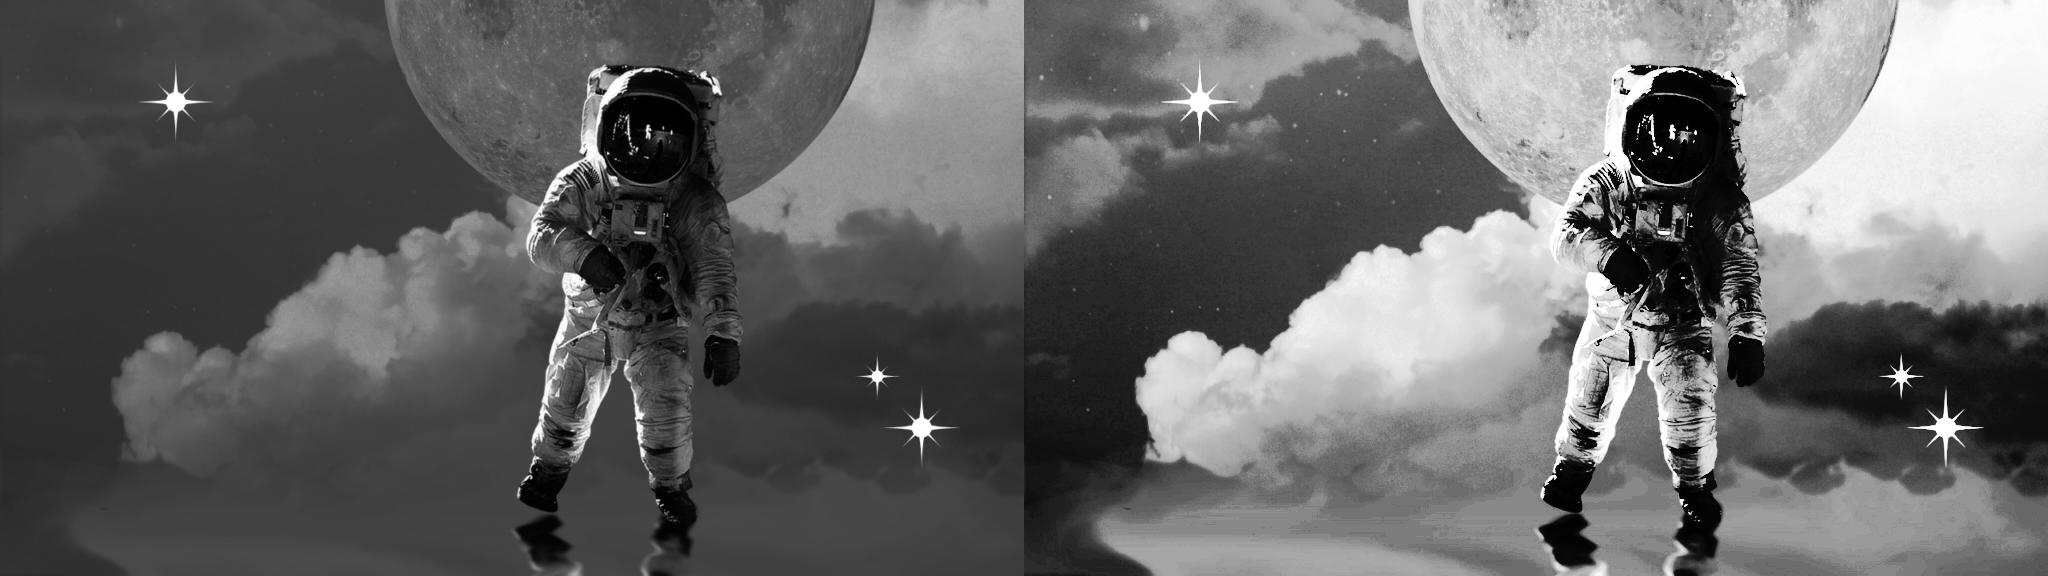

In [34]:
# apply histogram equalization
equ = cv2.equalizeHist(ast_image2)
disp = np.hstack((ast_image2, equ)) # stacking images side-by-side
cv2_imshow(disp)

/tmp/ipython-input-2325556297.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.flatten(),256,[0,256], color = 'r')


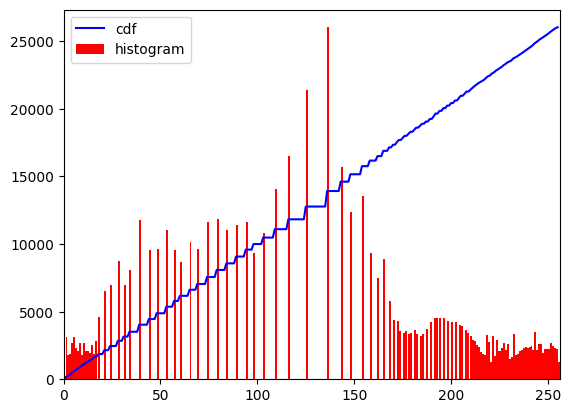

In [35]:
# plot the histogram and cdf of the processed image again
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()